# Introduction
The dataset is as following:
<ul>
    <li>Punching (Pu): 219 images.</li>
    <li>Weld line (Wl): 273 images.</li>
    <li>Crescent gap (Cg): 226 images.</li>
    <li>Water spot (Ws): 289 images.</li>
    <li>Oil spot (Os): 204 images.</li>
    <li>Silk spot (Ss): 650 images.</li>
    <li>Inclusion (In): 216 images.</li>
    <li>Rolled pit (Rp): 31 images.</li>
    <li>Crease (Cr): 52 images.</li>
    <li>Waist folding (Wf): 146 images.</li>
</ul>

It is quite unbalanced dataset. In order to simplify the project 2 approaches will be taken into considerration.
<ul>
    <li>Approach 1:</li>
        <ul> 
        <li>Exclude Rolled pit and Crease images and consider it as "normal products: 83 images".</li>
        <li>Get 83 images from each others categories and build the base model using YOLOv3.</li>
        <li>Therefore, the model will train on 83 * 9 = 747 images.</li>
        <li>Training set: 70% of data, validation set: 20%, and test set: 10%</li>
        <li>Training: 58 images, validation: 16 images, test: 9 images.</li>
        </ul>
    <li>Approach 2:</li>
        <ul>
        <li>Still exclude Rolled pit and Crease.</li>
        <li>Get all the others data for others categories and build the base model using YOLOv3.</li>
        <li>Training set: 70% of data, validation set: 20%, and test set: 10%</li>
        </ul>
</ul>
        <!-- - Training: 58 images, validation: 16 images, test: 8 images.         -->

# Prepare the dataset

In [2]:
# Import library
import zipfile
import os
import shutil
import pathlib

## Step 1: Create empty directories
     I will create several empty directories of the corresponding classes for train, validation, and test set.

In [3]:
base_dir = 'Approach_1'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir, 'test')

# Train set directory
train_cresent_gap_dir = os.path.join(train_dir, 'cresent_gap')
train_inclusion_dir = os.path.join(train_dir, 'inclusion')
train_oil_spot_dir = os.path.join(train_dir, 'oil_spot')
train_punching_hole_dir = os.path.join(train_dir, 'punching_hole')
train_silk_spot_dir = os.path.join(train_dir, 'silk_spot')
train_waist_folding_dir = os.path.join(train_dir, 'waist_folding')
train_water_spot_dir = os.path.join(train_dir, 'water_spot')
train_welding_line_dir = os.path.join(train_dir, 'welding_line')
train_normal_dir = os.path.join(train_dir, 'normal')

# Validation set directory
validation_cresent_gap_dir = os.path.join(validation_dir, 'cresent_gap')
validation_inclusion_dir = os.path.join(validation_dir, 'inclusion')
validation_oil_spot_dir = os.path.join(validation_dir, 'oil_spot')
validation_punching_hole_dir = os.path.join(validation_dir, 'punching_hole')
validation_silk_spot_dir = os.path.join(validation_dir, 'silk_spot')
validation_waist_folding_dir = os.path.join(validation_dir, 'waist_folding')
validation_water_spot_dir = os.path.join(validation_dir, 'water_spot')
validation_welding_line_dir = os.path.join(validation_dir, 'welding_line')
validation_normal_dir = os.path.join(validation_dir, 'normal')

# Test set directory
test_cresent_gap_dir = os.path.join(test_dir, 'cresent_gap')
test_inclusion_dir = os.path.join(test_dir, 'inclusion')
test_oil_spot_dir = os.path.join(test_dir, 'oil_spot')
test_punching_hole_dir = os.path.join(test_dir, 'punching_hole')
test_silk_spot_dir = os.path.join(test_dir, 'silk_spot')
test_waist_folding_dir = os.path.join(test_dir, 'waist_folding')
test_water_spot_dir = os.path.join(test_dir, 'water_spot')
test_welding_line_dir = os.path.join(test_dir, 'welding_line')
test_normal_dir = os.path.join(test_dir, 'normal')


In [17]:
# Create empty directory for train, validation, and test set
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

# Create empty directory for train set categories
os.mkdir(train_cresent_gap_dir)
os.mkdir(train_inclusion_dir)
os.mkdir(train_oil_spot_dir)
os.mkdir(train_punching_hole_dir)
os.mkdir(train_silk_spot_dir)
os.mkdir(train_waist_folding_dir)
os.mkdir(train_water_spot_dir)
os.mkdir(train_welding_line_dir)
os.mkdir(train_normal_dir)

# Create empty directory for validation set categories
os.mkdir(validation_cresent_gap_dir)
os.mkdir(validation_inclusion_dir)
os.mkdir(validation_oil_spot_dir)
os.mkdir(validation_punching_hole_dir)
os.mkdir(validation_silk_spot_dir)
os.mkdir(validation_waist_folding_dir)
os.mkdir(validation_water_spot_dir)
os.mkdir(validation_welding_line_dir)
os.mkdir(validation_normal_dir)

# Create empty directory for test set categories
os.mkdir(test_cresent_gap_dir)
os.mkdir(test_inclusion_dir)
os.mkdir(test_oil_spot_dir)
os.mkdir(test_punching_hole_dir)
os.mkdir(test_silk_spot_dir)
os.mkdir(test_waist_folding_dir)
os.mkdir(test_water_spot_dir)
os.mkdir(test_welding_line_dir)
os.mkdir(test_normal_dir)

## Step 2: Rename the data
    Since the collected data' names are not similar to the original folder which hard to know which data classes it belonged to. Therefore, I will change the name of the file in each folder into it's corresponding folder name + number.

In [4]:
raw_base_dir = 'first_dataset_A1/images'

name_dir = os.listdir(raw_base_dir)
for dir in name_dir:
    count = 1
    temp_path = os.path.join(raw_base_dir, dir)
    for file in os.listdir(temp_path):
        new_name = f'{dir}_{count}.jpg'

        old_path = os.path.join(temp_path, file)
        new_path = os.path.join(temp_path, new_name)
        os.rename(old_path, new_path)

        count += 1


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'first_dataset_A1/images\\crescent_gap\\crescent_gap_10.jpg' -> 'first_dataset_A1/images\\crescent_gap\\crescent_gap_2.jpg'

## Step 3: Sort the images into corresponding folders
    In this step, for Approach 1, I will randomly seperate the full data set into the ratio:
        - Train set:        58 images.
        - Validation set:   16 images.
        - Test set:         8 images. 

In [4]:
raw_base_dir = 'first_dataset_A1/images'

raw_data_path = pathlib.Path(raw_base_dir)

In [8]:
# Create empty list for storing paths
raw_crescent_gap_paths = []
raw_inclusion_paths = []
raw_normal_paths = []
raw_oil_spot_paths = []
raw_punching_hole_paths = []
raw_silk_spot_paths = []
raw_waist_folding_paths = []
raw_water_spot_paths = []
raw_welding_line_paths = []

# Collect corresponding image paths and combine into 1 array.
for item in raw_data_path.glob('*/*'):
    if item.is_file():
        if item.name.startswith('crescent_gap'):
            raw_crescent_gap_paths.append(str(item))
        elif item.name.startswith('inclusion'):
            raw_inclusion_paths.append(str(item))
        elif item.name.startswith('normal'):
            raw_normal_paths.append(str(item))
        elif item.name.startswith('oil_spot'):
            raw_oil_spot_paths.append(str(item))
        elif item.name.startswith('punching_hole'):
            raw_punching_hole_paths.append(str(item))
        elif item.name.startswith('silk_spot'):
            raw_silk_spot_paths.append(str(item))
        elif item.name.startswith('waist_folding'):
            raw_waist_folding_paths.append(str(item))
        elif item.name.startswith('water_spot'):
            raw_water_spot_paths.append(str(item))
        elif item.name.startswith('welding_line'):
            raw_welding_line_paths.append(str(item))         


In [21]:
# We choose RANDOMLY total 82 images for each classes:
# Train set: 58 images, Validation set: 16 images, Test set: 9 images.
import random

sample_number = 83
train_number = 58
validation_number = 16
test_number = 9

# Get sample
sample_crescent_gap     = random.sample(raw_crescent_gap_paths, sample_number)
sample_inclusion        = random.sample(raw_inclusion_paths, sample_number)
sample_normal           = random.sample(raw_normal_paths, sample_number)
sample_oil_spot         = random.sample(raw_oil_spot_paths, sample_number)
sample_punching_hole    = random.sample(raw_punching_hole_paths, sample_number)
sample_silk_spot        = random.sample(raw_silk_spot_paths, sample_number)
sample_waist_folding    = random.sample(raw_waist_folding_paths, sample_number)
sample_water_spot       = random.sample(raw_water_spot_paths, sample_number)
sample_welding_line     = random.sample(raw_welding_line_paths, sample_number)

In [22]:
# Copy images to corresponding folder!
for i in range(sample_number):
    if i < train_number: 
        # 58 images will go into train directories.
        shutil.copy(sample_crescent_gap[i],  train_cresent_gap_dir)
        shutil.copy(sample_inclusion[i],     train_inclusion_dir)
        shutil.copy(sample_normal[i],        train_normal_dir)
        shutil.copy(sample_oil_spot[i],      train_oil_spot_dir)
        shutil.copy(sample_punching_hole[i], train_punching_hole_dir)
        shutil.copy(sample_silk_spot[i],     train_silk_spot_dir)
        shutil.copy(sample_waist_folding[i], train_waist_folding_dir)
        shutil.copy(sample_water_spot[i],    train_water_spot_dir)
        shutil.copy(sample_welding_line[i],  train_welding_line_dir)
    elif i >= (train_number) and i < (train_number + validation_number):
        # 16 Images will go into validation directories.
        shutil.copy(sample_crescent_gap[i],  validation_cresent_gap_dir)
        shutil.copy(sample_inclusion[i],     validation_inclusion_dir)
        shutil.copy(sample_normal[i],        validation_normal_dir)
        shutil.copy(sample_oil_spot[i],      validation_oil_spot_dir)
        shutil.copy(sample_punching_hole[i], validation_punching_hole_dir)
        shutil.copy(sample_silk_spot[i],     validation_silk_spot_dir)
        shutil.copy(sample_waist_folding[i], validation_waist_folding_dir)
        shutil.copy(sample_water_spot[i],    validation_water_spot_dir)
        shutil.copy(sample_welding_line[i],  validation_welding_line_dir)
    else:
        # The rest which is 9 images will go into test directories.
        shutil.copy(sample_crescent_gap[i],  test_cresent_gap_dir)
        shutil.copy(sample_inclusion[i],     test_inclusion_dir)
        shutil.copy(sample_normal[i],        test_normal_dir)
        shutil.copy(sample_oil_spot[i],      test_oil_spot_dir)
        shutil.copy(sample_punching_hole[i], test_punching_hole_dir)
        shutil.copy(sample_silk_spot[i],     test_silk_spot_dir)
        shutil.copy(sample_waist_folding[i], test_waist_folding_dir)
        shutil.copy(sample_water_spot[i],    test_water_spot_dir)
        shutil.copy(sample_welding_line[i],  test_welding_line_dir)

In [5]:
train_crescent_gap_fnames   = os.listdir(train_cresent_gap_dir)
train_inclusion_fnames      = os.listdir(train_inclusion_dir)
train_normal_fnames         = os.listdir(train_normal_dir)
train_oil_spot_fnames       = os.listdir(train_oil_spot_dir)
train_punching_hole_fnames  = os.listdir(train_punching_hole_dir)
train_silk_spot_fnames      = os.listdir(train_silk_spot_dir)
train_waist_folding_fnames  = os.listdir(train_waist_folding_dir)
train_welding_line_fnames   = os.listdir(train_welding_line_dir)
train_water_spot_fnames     = os.listdir(train_water_spot_dir)

## We have finished seperate images from dataset into corresponding folders at Approach_1

# EDA
    We will take a look at a few pictures to get a better sense of what the data look like
    

In [6]:
%matplotlib inline

import matplotlib_inline as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph, we will output images in a 9x4 configuration

nrows = 9
ncols = 4

pic_index = 0 # Index for iteration over images.

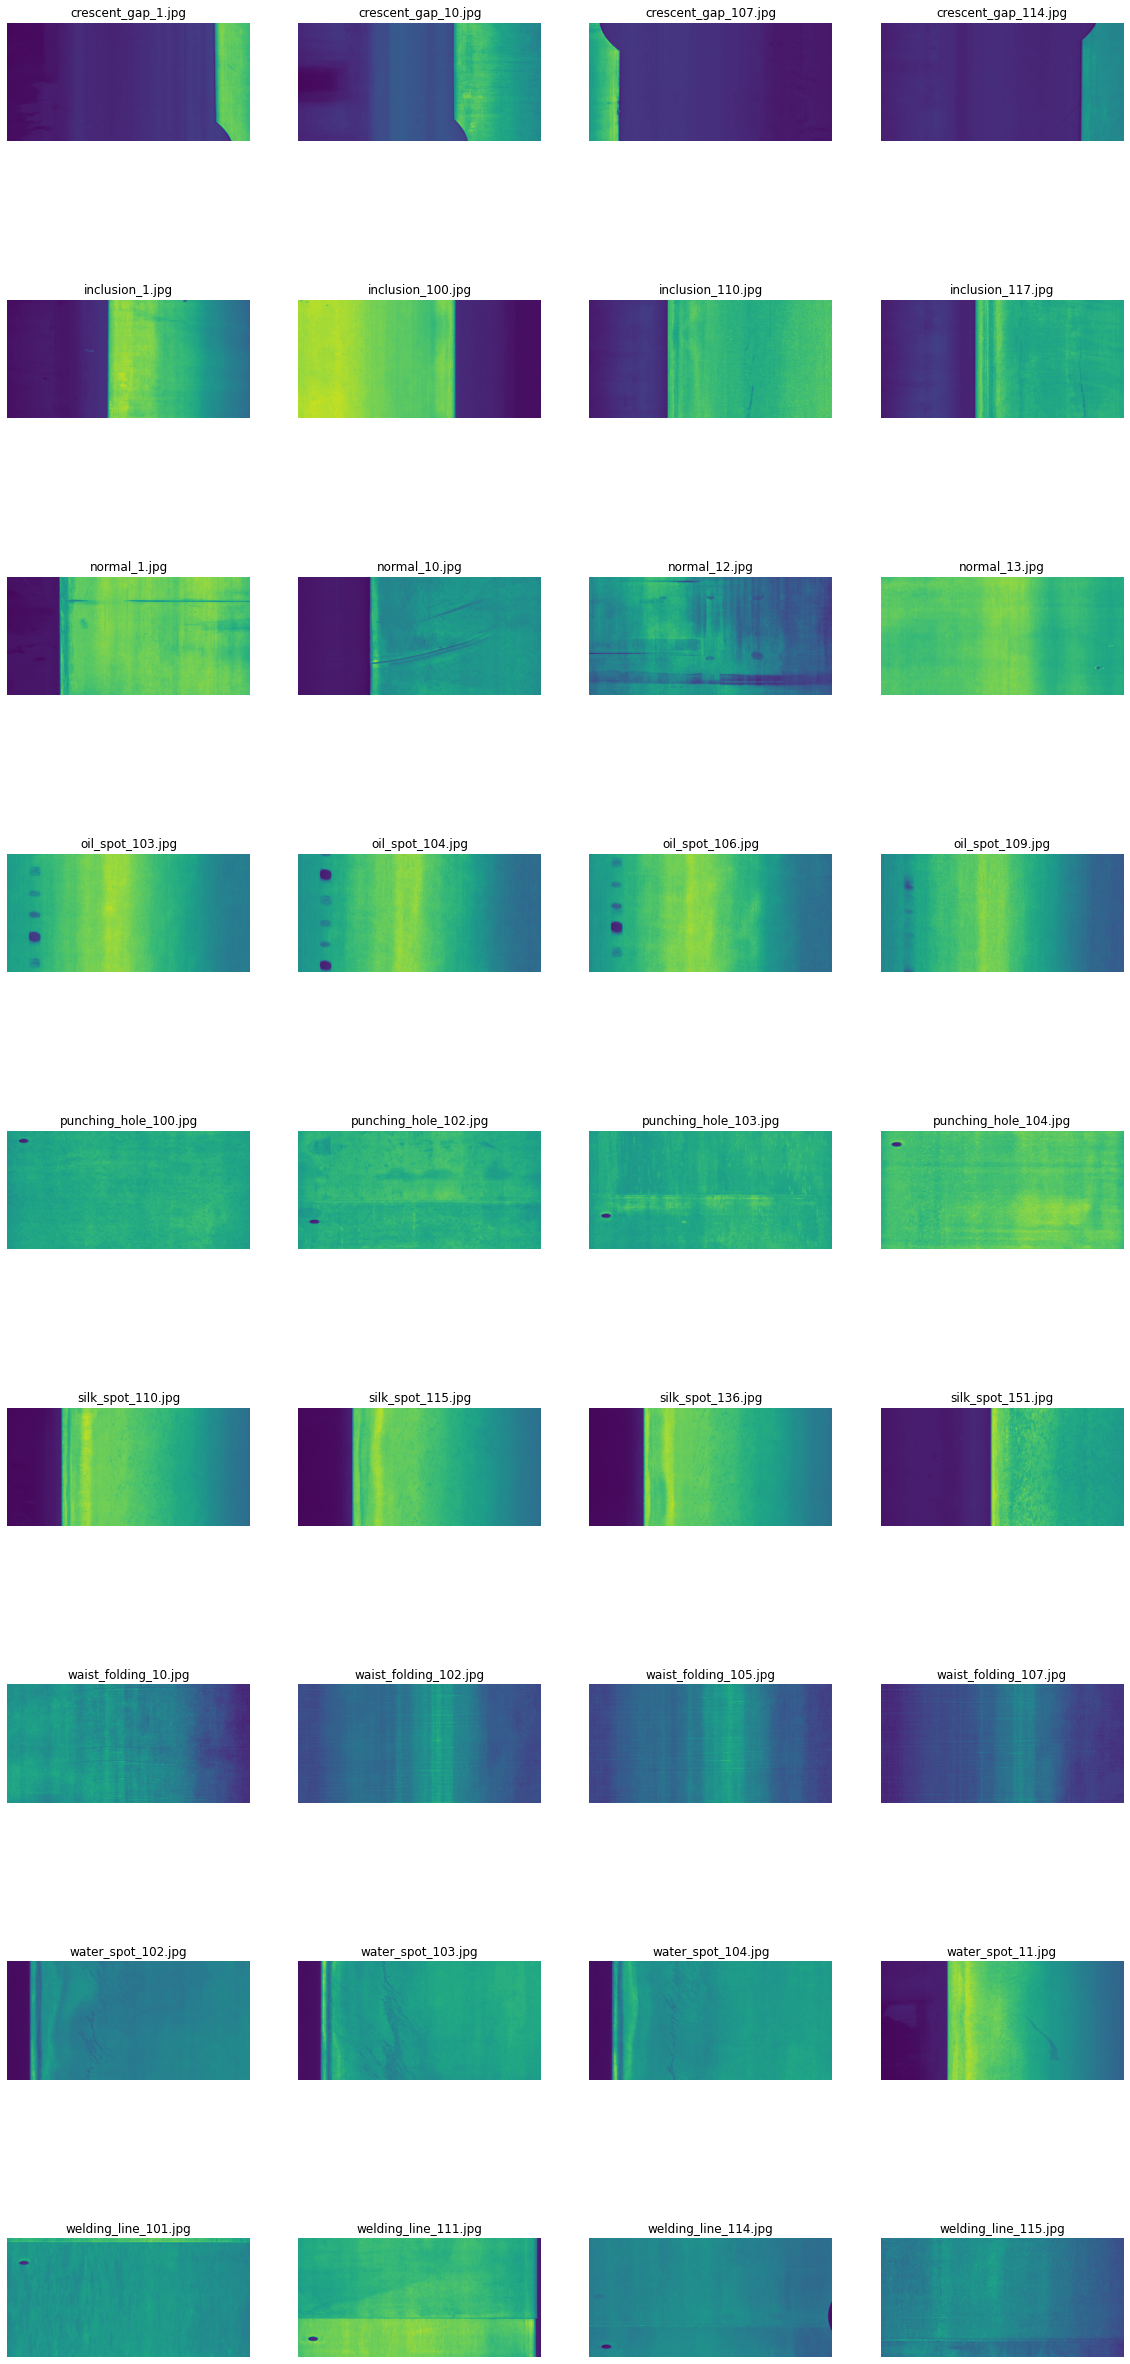

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure()
fig.set_size_inches(ncols*5, nrows*5)

pic_index += 4

next_crescent_gap_pix = [os.path.join(train_cresent_gap_dir, fname)
                         for fname in train_crescent_gap_fnames[pic_index -4: pic_index]
                        ]
next_inclusion_path_pix = [os.path.join(train_inclusion_dir, fname)
                         for fname in train_inclusion_fnames[pic_index -4: pic_index]
                         ]

next_normal_path_pix = [os.path.join(train_normal_dir, fname)
                         for fname in train_normal_fnames[pic_index -4: pic_index]
                         ]

next_oil_spot_path_pix = [os.path.join(train_oil_spot_dir, fname)
                         for fname in train_oil_spot_fnames[pic_index -4: pic_index]
                         ]

next_punching_hole_path_pix = [os.path.join(train_punching_hole_dir, fname)
                         for fname in train_punching_hole_fnames[pic_index -4: pic_index]
                         ]

next_silk_spot_path_pix = [os.path.join(train_silk_spot_dir, fname)
                         for fname in train_silk_spot_fnames[pic_index -4: pic_index]
                         ]

next_waist_folding_path_pix = [os.path.join(train_waist_folding_dir, fname)
                         for fname in train_waist_folding_fnames[pic_index -4: pic_index]
                         ]

next_water_spot_path_pix = [os.path.join(train_water_spot_dir, fname)
                         for fname in train_water_spot_fnames[pic_index -4: pic_index]
                         ]

next_welding_line_path_pix = [os.path.join(train_welding_line_dir, fname)
                         for fname in train_welding_line_fnames[pic_index -4: pic_index]
                         ]

next_full = next_crescent_gap_pix + next_inclusion_path_pix + next_normal_path_pix + next_oil_spot_path_pix + next_punching_hole_path_pix + next_silk_spot_path_pix + next_waist_folding_path_pix + next_water_spot_path_pix + next_welding_line_path_pix

for i, img_path in enumerate(next_full):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    sp.title.set_text(img_path.split('\\')[-1])
    img = mpimg.imread(img_path)
    plt.imshow(img) 